## Model Definition


Operation carried out in this notebook:

1. **Dataset splitting:** dividing a set of sample texts to perform training, validation, and testing of a DL model;
2. **Vectorization and Embedding:** converting text samples into a tensor data format that can be processed by a DL model;
3. **Binary classification and supervised learning:** definition of a deep network model for AI-generated text detection. Training and validation of the model;
4. **Testing:** evaluating model's performances on previously unseen instances;

In [ ]:
#Key Imports
import numpy as np #multi-dimensional arrays (tensors) operations
import pandas as pd #dataframe operations and analysis
import matplotlib.pyplot as plt #plots and graphs (MATLAB-like interface)

import tensorflow as tf #machine learning back-end engine
print("Tensor Flow version:", tf.__version__)
print('\n')

import os #library for system-dependent functionalities

import re #regex operations

Tensor Flow version: 2.15.0




In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive') #mount my private Google Drive on Colab environment

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To start, we need to select wich dataset of pre-processed text samples we want to upload from our project's repository, out of 12 possible options.
Also, we need to properly read the tokenized samples from the .csv file as array of strings (tokens).

## Loading Dataset

In [ ]:
#Inspect Drive folder

# Input: string dir
#        string filename
# Output: creates and returns a pandas dataframe "data" from the dir/filename.csv file and displays its structure
def load_dataframe_and_print_info(dir, filename):
    file_path=os.path.join(dir, filename)
    data=pd.read_csv(file_path)
    print('Dataset', filename)
    data.info()
    print('\n')
    return data

# Input: dataframe data
# Output: if formats the values of the column 'text' in the dataframe 'data' from string to array of strings
def format_text(data):
    characters_to_remove=[",", "[", "]", '\'', '\'']
    for index, row in data.iterrows():
        for char in characters_to_remove:
            row['text']=row['text'].replace(char, "")
        text=row['text'].split()
        data.at[index, 'text']=text
    return data

print('Available data:')
working_dir='/content/drive/MyDrive/DL/Project'
data_dir=file_path=os.path.join(working_dir, 'Project_datasets')
pattern=re.compile(r'processed_training.*\.csv$')
filenames=[]
for f in os.listdir(data_dir): #inspect folder's content
    if pattern.match(f):
      print('-', f)
      filenames.append(f)

print('\n')

dataset=load_dataframe_and_print_info(data_dir, filenames[9])
dataset=format_text(dataset)
pd.set_option('display.max_colwidth', 1)
dataset

Available data:
- processed_training_set.csv
- processed_training_setS.csv
- processed_training_setL.csv
- processed_training_setSWS.csv
- processed_training_set2.csv
- processed_training_set2S.csv
- processed_training_set2L.csv
- processed_training_set2SW.csv
- processed_training_set2SWS.csv
- processed_training_set2SWL.csv
- processed_training_setSW.csv
- processed_training_setSWL.csv


Dataset processed_training_set2SWL.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66731 entries, 0 to 66730
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       66731 non-null  object
 1   generated  66731 non-null  int64 
 2   prompt_id  66731 non-null  int64 
 3   source     66731 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.0+ MB




,text,generated,prompt_id,source
0,"[car, car, around, since, became, famous, one, thousand, nine, hundred, henry, ford, created, built, first, modelt, car, played, major, role, every, day, life, since, people, starting, question, limiting, car, usage, would, good, thing, limiting, use, car, might, good, thing, like, matter, article, german, suburb, life, go, without, car, elizabeth, rosenthal, state, automobile, linchpin, suburb, middle, class, family, either, shanghai, chicago, tend, make, home, expert, say, huge, impediment, current, effort, reduce, greenhouse, gas, emission, tailpipe, passenger, car, responsible, twelve, percent, greenhouse, gas, emission, europeand, fifty, percent, carintensive, area, united, state, car, main, reason, greenhouse, gas, emission, lot, people, driving, around, time, ...]",0,0,Kaggle
1,"[transportation, large, necessity, country, worldwide, doubt, car, bus, mean, transportation, make, going, place, place, easier, faster, however, always, negative, pollution, although, mobile, transportation, huge, part, daily, life, endangering, earth, harmful, greenhouse, gas, could, suppressed, small, suburb, community, germany, called, vauban, started, carfree, lifestyle, city, market, store, placed, nearby, home, instead, located, farend, highway, although, vauban, completely, carfree, seventy, vauban, family, car, even, large, fiftyseven, family, stated, sold, car, move, vauban, family, even, said, le, stressed, depending, car, transportation, car, responsible, twelve, greenhouse, gas, even, fifty, carintensive, area, united, state, another, insight, reduced, car, zone, brings, paris, incident, smog, paris, official, ...]",0,0,Kaggle
2,"[america, love, affair, vehicle, seems, cooling, say, elisabeth, rosenthal, understand, rosenthals, perspective, easier, suggest, america, car, usage, decreasing, slowly, necessarily, bad, sense, certain, positive, effect, advantage, limiting, car, usage, includes, increase, security, health, along, decrease, pollution, dependence, firstly, car, usage, limited, security, health, likely, guaranteed, feeling, secure, highly, important, individual, everywhere, example, many, people, colombia, used, public, transportation, car, free, day, leaving, street, capital, city, according, andrew, selsky, eerily, devoid, traffic, jam, complication, stem, traffic, jam, end, feeling, confidence, plan, get, point, b, simple, second, ago, complication, personal, plan, lead, become, stressed, feeling, doubt, overcomes, thought, car, usage, limited, would, ...]",0,0,Kaggle
3,"[often, ride, car, drive, one, motor, vehicle, work, store, mall, ever, thought, many, people, world, exact, thing, travel, every, destination, using, fuel, powered, motorvehicle, many, people, realize, intensive, damage, turn, key, ignition, drive, work, today, like, regular, car, user, thought, could, never, survive, without, car, may, run, mind, possible, though, live, without, main, mean, transport, look, city, like, cuban, paris, bogota, one, way, restricted, people, usage, car, actually, enjoy, limit, car, usage, intern, result, many, advantage, benefit, community, recognized, benefit, giving, car, usage, would, positive, consequence, health, source, one, heidrun, walter, state, car, always, tense, much, happier, without, think, imagine, ...]",0,0,Kaggle
4,"[car, wonderful, thing, perhaps, one, world, greatest, advancement, technology, car, get, u, point, point, exactly, want, human, want, get, one, place, anther, fast, possiile, car, suitaile, get, u, across, city, matter, minute, much, faster, anyhting, else, train, going, get, across, city, fast, car, neither, puilic, ius, iut, form, transportation, might, ie, way, go, get, wrong, car, aisolutly, amazing, thing, iut, mayie, way, much, stress, mayie, hurt, environment, way, think, ius, train, worry, aiout, washing, car, getting, frustrated, stuck, iad, traffic, jam, four, also, much, pollution, air, hurting, environment, might, think, iut, many, advantage, limi

In the pre-processed dataset, text samples are saved as array of strings (tokens). To feed them into our network, we need to convert the samples back to strings, concatenating their tokens.
Labels are instead coded by integer values:


*   *0* means that the text is human-written;
*   *1* means that the text is AI-generated;



In [ ]:
# Input: dataframe data
# Output: if formats the values of the column 'text' in the dataframe 'data' from array of strings to string
def text_to_string(data):
    for index, row in data.iterrows():
        text=' '.join(row['text'])
        data.at[index, 'text']=text
    return data

sampleList=dataset['text'].iloc[0]
text_to_string(dataset)
sampleString=dataset['text'].iloc[0]
label=dataset['generated'].iloc[0]

print("Tokenized text sample (array of tokens):", sampleList)
print("Sample type:", type(sampleList))
print("Sample length (number of tokens):", len(sampleList))
print('\n')

print("Tokenized text sample (string):", sampleString)
print("Sample type:", type(sampleString))
print("Sample length (number of tokens):", len(sampleString.split()))
print('\n')

print("Associated label:", label)
print("Label type:", type(label))

Tokenized text sample (array of tokens): ['car', 'car', 'around', 'since', 'became', 'famous', 'one', 'thousand', 'nine', 'hundred', 'henry', 'ford', 'created', 'built', 'first', 'modelt', 'car', 'played', 'major', 'role', 'every', 'day', 'life', 'since', 'people', 'starting', 'question', 'limiting', 'car', 'usage', 'would', 'good', 'thing', 'limiting', 'use', 'car', 'might', 'good', 'thing', 'like', 'matter', 'article', 'german', 'suburb', 'life', 'go', 'without', 'car', 'elizabeth', 'rosenthal', 'state', 'automobile', 'linchpin', 'suburb', 'middle', 'class', 'family', 'either', 'shanghai', 'chicago', 'tend', 'make', 'home', 'expert', 'say', 'huge', 'impediment', 'current', 'effort', 'reduce', 'greenhouse', 'gas', 'emission', 'tailpipe', 'passenger', 'car', 'responsible', 'twelve', 'percent', 'greenhouse', 'gas', 'emission', 'europeand', 'fifty', 'percent', 'carintensive', 'area', 'united', 'state', 'car', 'main', 'reason', 'greenhouse', 'gas', 'emission', 'lot', 'people', 'driving', 

Before feeding the text samples into the model, we need to balance the dataset, so that it presents an equal portion of samples labelled with "0" and an equal portio of samples labelled with "1".

In [ ]:
#Separating human-written and generated texts into two distinct dataframes
datasets=[]
datasets.append(pd.DataFrame(dataset[dataset['generated']==0])) #Human-written texts
datasets.append(pd.DataFrame(dataset[dataset['generated']==1])) #AI-generated texts

size=min(datasets[0].shape[0], datasets[1].shape[0]) #number of samples for each label

#Eliminating extra texts to balance the dataset
largest=np.argmax([df.shape[0] for df in datasets]) #identifies which label has extra samples that need to be dropped
datasets[largest]=datasets[largest].sample(frac=1) #.reset_index(drop=True) #shuffling
datasets[largest]=datasets[largest].iloc[:size]

dataset=pd.concat([datasets[0], datasets[1]]).sample(frac=1)
dataset.reset_index(drop=True, inplace=True)

print('Final dataset:')
print('\n')
dataset.info()
print('\n')
dataset

Final dataset:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49066 entries, 0 to 49065
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       49066 non-null  object
 1   generated  49066 non-null  int64 
 2   prompt_id  49066 non-null  int64 
 3   source     49066 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.5+ MB




,text,generated,prompt_id,source
0,carfree city becoming increasingly popular modern world many city around world looking become sustainable environmentally friendly one way promoting carfree lifestyle essay aim explore benefit carfree city implication society without car one main benefit carfree society reduction air pollution car leading source air pollution reducing number car road city drastically reduce pollution level significant positive impact public health exposure air pollution cause range respiratory problem carfree city also generally prosperous rely heavily car encourage walking cycling public transport lead increased foot traffic spending local business also lead decrease traffic congestion economic benefit reducing time cost commuting also many social benefit carfree society walking cycling great way socialize others people meet chat exercising carfree city also lead decrease crime violence people likely public space however challenge carfree society one biggest challenge loss job car industry fewer people drive may fewer job area like car manufacturing maintenance repair additionally people may find difficult adjust society required walk bike take public transport instead driving another challenge potential increased traffic congestion area people may travel longer distance reach destination could lead increased wear tear road bridge infrastructure conclusion carfree city offer range benefit including reduced air pollution increased economic prosperity improved social outcome however also challenge carfree society including loss job car industry potential increase traffic congestion important carefully weigh benefit challenge deciding whether carfree city right way forward sustainable future,1,0,Mistral7B_CME_v7
1,title pro con graduating high school three year eight th grader often wondered idea graduating high school three year instead traditional four people may think great idea others may concern researching pro con come realize advantage disadvantage graduating early one biggest advantage graduating early get ahead game start college enter workforce earlier peer giving head start career especially beneficial know exactly want want get jumpstart future additionally extra time decide career helpful still unsure want high school another advantage graduating early enough time take advantage extra opportunity example could take gap year travel volunteer work help gain valuable life experience build resume could also use extra time focus specific area interest sport music art become expert field however also potential disadvantage graduating early one biggest concern may adequately prepared enter college workforce high school academic also learning life skill social skill navigate world graduating early may mean miss important life lesson could make harder succeed long run another concern parent graduating early may much pressure student high school already challenging time adding extra year school overwhelming parent may worry child able handle extra workload burn even start college conclusion advantage graduating high school three year also potential disadvantage consider important weigh pro con carefully talk,1,14,llama2_chat
2,dear florida state senator writing position electoral college seems difficult depend electoral college american people vote president right way mistake uncertain way handle people vote probably understand use electoral college many voter vote chance people choose argue electoral college might call disaster factor american people consider lucky two hundred fiasc biggest election crisis century system allows much worse indefensible electoral college even bestlaid defense system wrong bradford plumer elector responsible choosing defying people elector would sometimes refuse vote party candidate cast whomever please vote counted indivdual voter another reason electoral college big state get attention liitle state electoral college restores weight political balance large state population lo

## Stats on dataset

Dataset prompts_set.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   prompt_id    15 non-null     int64 
 1   prompt_name  15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes




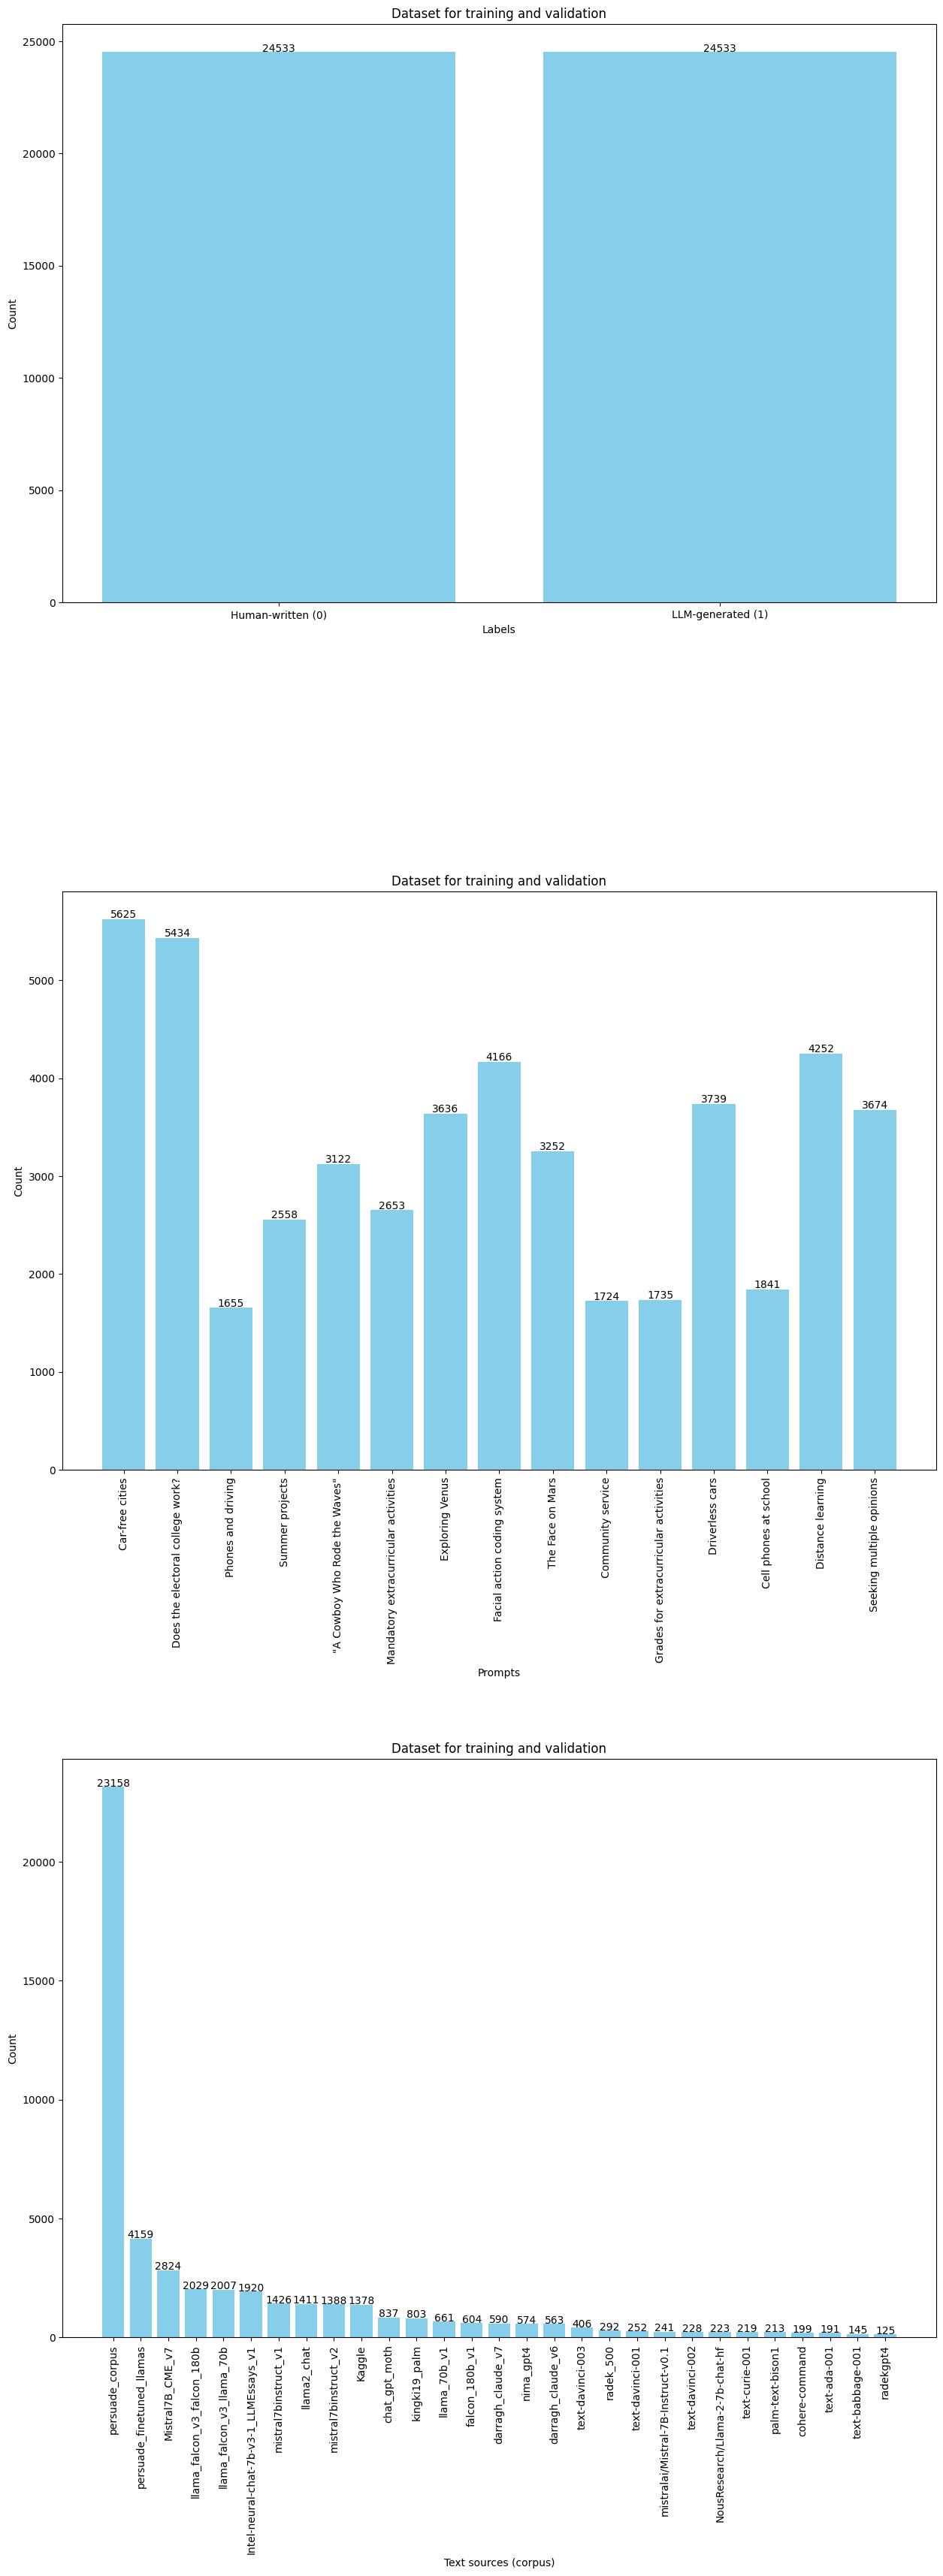

In [ ]:
#Stats on the final dataset

# Input: axes ax
#        string feature
#        series count
#        string set_name
#        list<string> xValues
# Output: given a pandas series "count" (computed over the column "feature" of the dataset called "set_name"), it plots it in the bar chart "ax"
#         the horizontal axis is labelled with the list "xValues" with rotation "verse"
def bar_plot(ax, feature, count, set_name, xValues, verse):
   ax.bar(xValues, count, color='skyblue')
   ax.set_title(set_name)
   ax.set_xlabel(feature)
   ax.set_ylabel('Count')
   ticks=range(len(count))
   ax.set_xticks(ticks, xValues, rotation=verse)

   for j, v in enumerate(count):
       ax.text(j, v + 15, str(v), ha='center')

#Loading prompts set
data_dir=file_path=os.path.join(working_dir, 'Project_datasets')
prompts=load_dataframe_and_print_info(data_dir, "prompts_set.csv")

fig, axs=plt.subplots(3, 1, figsize=(15, 40))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

label_count1=dataset["generated"].value_counts().sort_index()
labels=['Human-written (0)', 'LLM-generated (1)']

prompt_count1=dataset["prompt_id"].value_counts().sort_index()
prompt_names=prompts['prompt_name'].unique().tolist() #creates prompts list
#prompts=[prompt_names[0], prompt_names[1]] #prompts lists if there are only two prompts

source_count1=dataset['source'].value_counts()
sources_list1=list(source_count1.index)

ax=axs.flatten()[0]
bar_plot(ax, 'Labels', label_count1, 'Dataset for training and validation', labels, 0)

ax=axs.flatten()[1]
bar_plot(ax, 'Prompts', prompt_count1, 'Dataset for training and validation', prompt_names, 'vertical')

ax=axs.flatten()[2]
bar_plot(ax, 'Text sources (corpus)', source_count1, 'Dataset for training and validation', sources_list1, 'vertical')

The first hyper-parameter to establish is an equal lenght (number of tokens) for the text sample that need to be fed into the model. We choose a length sufficient to cover 60% of the samples.

Samples shorter then the selected length will be padded with "0" during vectorization.
Longer samples will be trimmed to match the selected length.

Texts stats in words
Min text length: 100
Max text length: 892
Mean text length: 218
Median text length: 199
Mode text lengths: [193]
Frequency of mode length= 329






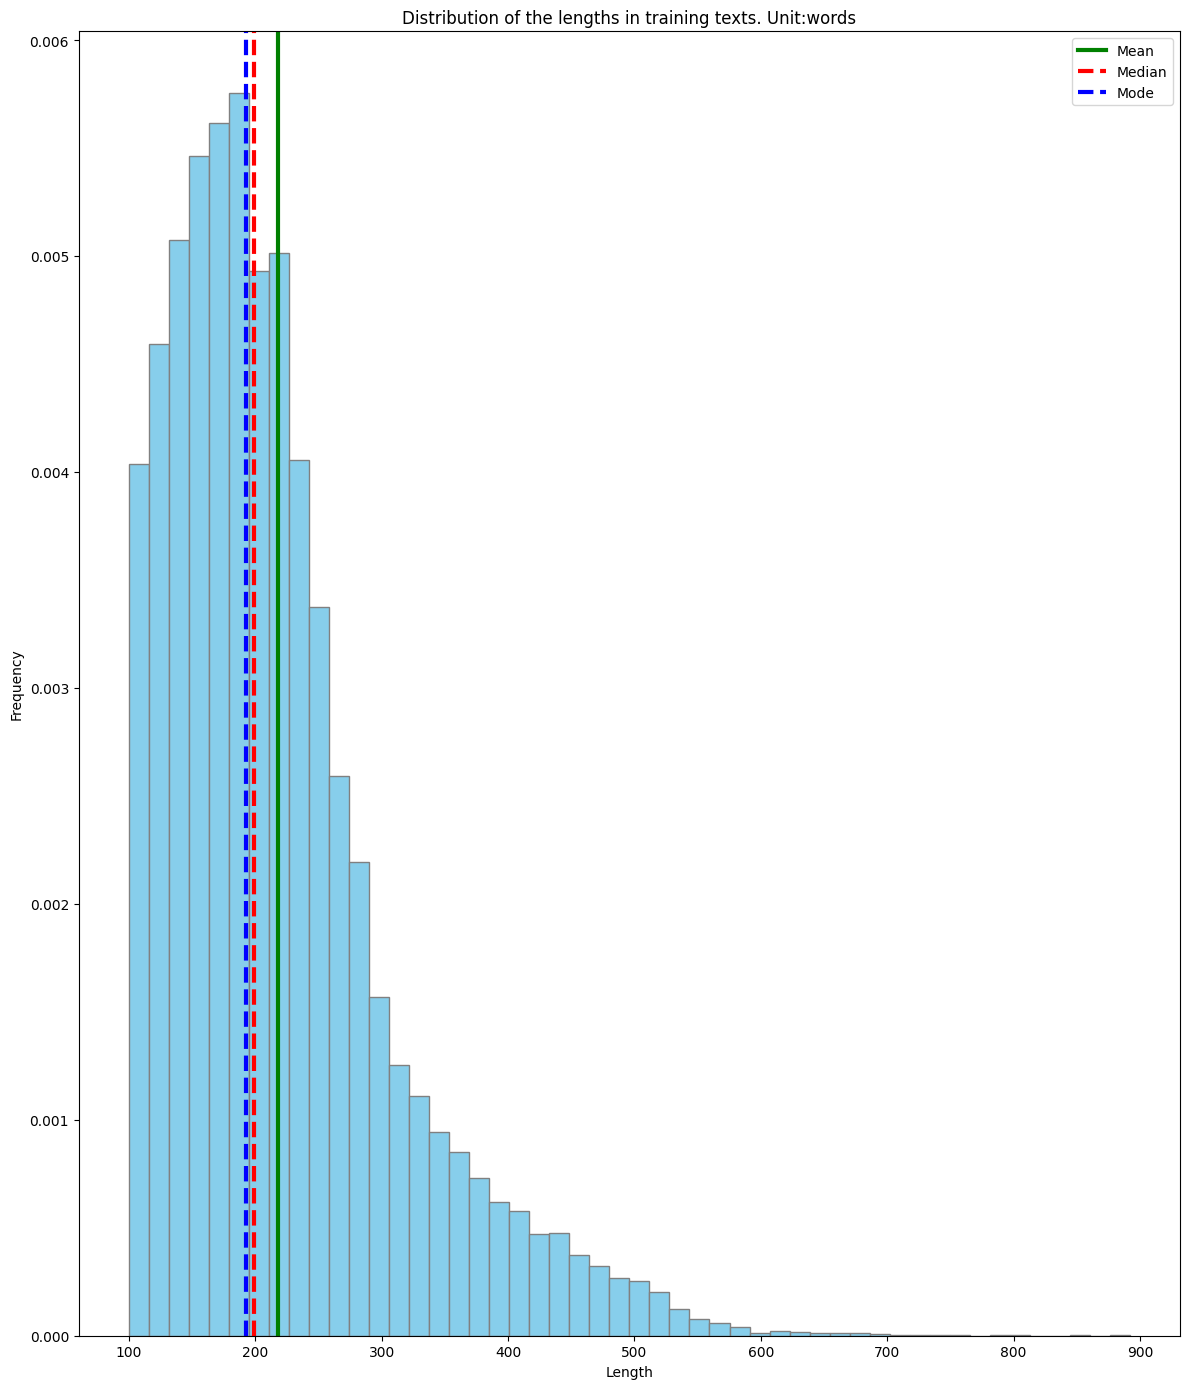

Selected sample length: 218


In [ ]:
#Stat on text's lengths and computing the sample length

# Input: pandas.Series lengths
#        float percentage
# Output: given a series "lengths", it orders it and returns the index of the element corresponding to the given "percentage" of the series
def compute_sample_length(lengths, percentage):
    sorted_lengths=np.sort(lengths)
    index=int(percentage*len(sorted_lengths))
    if index>=len(sorted_lengths):
        index=len(sorted_lengths)-1
    length=sorted_lengths[index]
    return int(length)

# Input: axes ax
#        string feature
#        series count
# Output: given the pandas series count of the lengths of training essays measured in "unit",it plots it in the histogram "ax"
def hist_plot(ax, unit, count): #plots the "feature" count of the dataset "set_name" in a bar chart
    ax.hist(count, bins=50, color='skyblue', edgecolor='grey', density=True)
    ax.set_title('Distribution of the lengths in training texts. Unit:'+unit)
    ax.set_xlabel('Length')
    ax.set_ylabel('Frequency')
    ax.axvline(count.mean(), color='green', linestyle='solid', linewidth=3, label='Mean')
    ax.axvline(count.median(), color='red', linestyle='dashed', linewidth=3, label='Median')
    ax.axvline(count.mode()[0], color='blue', linestyle='dashed', linewidth=3, label='Mode')
    ax.legend()

# Input: series lenghts
#        string unit
# Output: given the pandas series "lengths" containing the length of the training essays measured in "unit", it computes stats over it and displays them
def print_stats(lengths, unit):
    print('Texts stats in', unit)
    max_len=lengths.max()
    min_len=lengths.min()
    mean_len=lengths.mean()
    median_len=lengths.median()
    mode_len=lengths.mode()

    print('Min text length:', min_len)
    print('Max text length:', max_len)
    print('Mean text length:', round(mean_len))
    print('Median text length:', round(median_len))
    print('Mode text lengths:', list(mode_len))

    mode_count=lengths.value_counts().loc[mode_len[0]] #how many times the mode lengths occurs in the training dataset
    print("Frequency of mode length=", mode_count)
    print('\n')

lengths=dataset['text'].apply(lambda x: len(str(x).split()))
print_stats(lengths, 'words')
print('\n')

fig, ax=plt.subplots(figsize=(12, 14))
hist_plot(ax, 'words', lengths)

plt.tight_layout()
plt.show()

percentage=0.6
SAMPLE_LENGTH=compute_sample_length(lengths, percentage)
print('Selected sample length:',SAMPLE_LENGTH)

The second hyperparameter is the size of our dictionary.
Only words (tokens) inside the dictionary will be coded into an integer number during vectorization. All other words will be coded with a "1", representing an unknown token.
As criterion, we choose a vocabolary size such that all words occurring more then a 32-times threshold in the sample texts are coded. Below this threshold we find words that carry little meaning (like names) or that can create noise (such as errors or non-sensical gibberish).

In [ ]:
#Stat on word's distribution
unique_words=set() #set containing all unique words present in the sample texts
word_occurrences={} #dictionary associating each word with the number of times it occurs in the sample texts

for text in dataset['text']:
    #update occurrences
    for word in text.split():
        unique_words.add(word)
        word_occurrences[word]=word_occurrences.get(word, 0)+1

num_unique_words=len(unique_words)
print(f"Unique words: {num_unique_words}")
#print(unique_words)
print("\n")

print("Occurrences per word:")
print(dict(sorted(word_occurrences.items(), key=lambda item: item[1], reverse=True)))
print("\n")

#Computing the dictionary length
# threshold=32  #Minimum allowed number of occurences

# # Remove words below the threshold from unique_words
# unique_words={word for word in unique_words if word_occurrences.get(word, 0)>=threshold}

# VOCAB_SIZE=len(unique_words)
# print('Computed length for our dictionary:', VOCAB_SIZE)

Unique words: 98339


## Training settings

The next step is *dataset splitting*:


1.   **First strategy:** when dealing with sample texts generated with only two prompts, having fewer samples we reserve 20% of the dataset for testing, while the remaining 80% will be used for training with k-fold validation;
2.   **Second strategy:** when dealing with sample texts generated with 15 different prompts, having enough samples we reserve 70% of the dataset for training, 15% of the dataset for validation and 15% of the dataset for testing;


In [ ]:
# #Splitting dataset (first strategy)
# from sklearn.model_selection import train_test_split

# train_dataset, test_dataset=train_test_split(dataset, test_size=0.2, random_state=42)

# print("Training samples:", len(train_dataset))
# print("Test samples:", len(test_dataset))

In [ ]:
#Splitting dataset (second strategy)
from sklearn.model_selection import train_test_split

train_dataset, valTest=train_test_split(dataset, test_size=0.3, random_state=42)
val_dataset, test_dataset=train_test_split(valTest, test_size=0.5, random_state=42)

print("Training samples:", len(train_dataset))
print("Validation samples:", len(val_dataset))
print("Test samples:", len(test_dataset))

Training samples: 34346
Validation samples: 7360
Test samples: 7360


In [ ]:
!pip install keras-tuner --upgrade
import keras_tuner

Now we set the other hyper-parameters of our model:


*   **Buffer size:** the number of elements from which the dataset will sample (with shuffling) when loading data for training;
*   **Batch size:** the number of samples that will be considered for a single parameter update;
*   **Number of epochs:** a complete execution of the learning algorithm (forward pass and backward pass) on the entire training set (all batches);
*   **Learning rate:** the step size at which the model parameters are updated during training;
*   **Weigth decay:** an additional penalty to the loss function that discourages large weights (L2 regularization);
*   **Dropout rate:** probability of dropping for the input units of a layer (to combat overfitting);
*   **Embedding dimensionality:** dimensionality of the embedding space were words will be represented as vectors;



In [ ]:
#Model's Hyper-parameters
BUFFER_SIZE=1000
BATCH_SIZE=64
EPOCHS=5
VOCAB_SIZE=10000
LEARNING_RATE=0.001
WEIGHT_DECAY=0.1
DROPOUT=0.5
EMBEDDING_DIM=3000

The next step consists into converting the text samples from pandas dataframes to tensors of tensorflow (a data format optimized for deep learning).
Each text sample is therefore coded as a 1D tensor of strings, while the entire sample set is a 2D tensor.

Next we define the "vectorization layer": in the model, it will be responsible to code the words of each text into an integer index. So, each sample will be turned into a 1D tensor of integers, while the entire sample set will be a 2D tensor.

In [ ]:
train_texts=train_dataset['text'].tolist()
train_labels=train_dataset['generated'].tolist()

#Converting training and validation set to tensorflow datasets
train_dataset=tf.data.Dataset.from_tensor_slices((train_texts, train_labels))
train_dataset=train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

#Only when training with texts generated with 15 different prompts (larger dataset)
val_texts=val_dataset['text'].tolist()
val_labels=val_dataset['generated'].tolist()

val_dataset=tf.data.Dataset.from_tensor_slices((val_texts, val_labels))
val_dataset=val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

#translates text samples from strings to array of integers + padding of every sample to SAMPLE_LENGTH
encoder=tf.keras.layers.TextVectorization(output_sequence_length=SAMPLE_LENGTH, standardize=None, max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
print('We vectorize sample texts using the following vocabulary:')
vocabulary=np.array(encoder.get_vocabulary())
print(vocabulary)
print('Vocabulary size: ', len(vocabulary))
print('\n')

example=train_dataset.take(1)
encoded_example=[]

for text, label in example:
    encoded_example=encoder(text)[:1]
    print('Text: ', encoded_example.numpy())
    print('Text shape: ', encoded_example.shape)
    print('Encoding type: ', encoded_example.dtype)
    print('Label: ', label[:1].numpy())
    print('Label type: ', label.dtype)

decoded_example=[]

for index in range(len(encoded_example)):
    decoded_example.append(vocabulary[encoded_example[index]])

print('\n')
print(decoded_example)

We vectorize sample texts using the following vocabulary:
['' '[UNK]' 'student' ... 'terribly' 'syllabus' 'swept']
Vocabulary size:  10000


Text:  [[ 104  194  646  399  328   23   60 3008   96  318 2051 1144  476   11
     1  161  194  646   10   47  576  304  156  575   23  170 2051 1144
    96  185  830 1818  365   96 5306   43 1713  630  194  705 2295  701
  1144  111   47 1614 5306  318 2051 1144   10  187  521 4717  102    9
    60 3390    1  161 1462   11    5  194  646   61  358  194 2640   23
    10   47  282  999  772  304  607   89  561  328  432   48  194  646
     9   60  753  313  159  193  164  328   23  988  194  313  105 3766
   427   26  874  194   22 3202  194   88  112   23  283  194  646  467
   328   23 5306   96  318 2051 1144  989    1  161  988  194  313  159
   187  194  575   23    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    

Now we define the network's model.

In [ ]:
!pip install pydot
!pip install graphviz

## Tuning of the embedding layer
A first hyper-parameter tuning to obtain a fast tuned model from which to start the analysis.

Hyper-parameters:

* Embedding dimensionality (300, 1200, 2400, 3000, 4200);

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, SimpleRNN, LSTM, Dense, Embedding, Dropout, Bidirectional
from keras.utils import plot_model
from keras import optimizers, regularizers
import keras_tuner

def build_model(hp):
    model=Sequential()
    model.add(encoder)

    #transform texts from (SAMPLE_LENGTH,) tensors of integers to (SAMPLE_LENGTH, dim_emb) tensors of floats (word embedding)
    #input 2D tensor (text,words=SAMPLE_LENGTH)
    #output 3D tensor (text, words=SAMPLE_LENGTH, word embedding=dim_emb)
    dim_emb=hp.Choice('dim_emb', [300, 1200, 2400, 3000, 4200])
    model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=dim_emb, mask_zero=True))

    #simple-RNN
    model.add(Bidirectional(LSTM(16, dropout=DROPOUT, recurrent_dropout=DROPOUT, return_sequences=True)))
    model.add(Bidirectional(LSTM(16))) #obligatory layer

    #Dense classifier
    model.add(Dense(8, kernel_regularizer=regularizers.l2(WEIGHT_DECAY), activation='relu'))
    model.add(Dense(1, activation='sigmoid')) #obligatory layer

    model.compile(optimizer=optimizers.RMSprop(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy', metrics=['acc'])

    return model

In [ ]:
#Initialize the hyper-parameters tuning
dir=os.path.join(working_dir, 'Trained_Models')
path=os.path.join(dir, 'tuningEmbSummary')

tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective="val_acc",
    max_epochs=EPOCHS,
    factor=3,
    directory=dir,
    project_name=path
)

In [ ]:
#Creates the model with tunable hyper-parameters
build_model(keras_tuner.HyperParameters())

In [ ]:
#Hyper-parameters search field
tuner.search_space_summary()

Search space summary
Default search space size: 1
dim_emb (Choice)
{'default': 300, 'conditions': [], 'values': [300, 1200, 2400, 3000, 4200], 'ordered': True}


In [ ]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(train_texts, train_labels,
             epochs=EPOCHS,
             validation_data=(val_texts, val_labels),
             callbacks=[stop_early],
             use_multiprocessing=True,
             workers=4)

best_model = tuner.get_best_models()[0]

Trial 7 Complete [01h 07m 53s]
val_acc: 0.964266300201416

Best val_acc So Far: 0.972690224647522
Total elapsed time: 05h 53m 39s


In [ ]:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/DL/Project/Trained_Models/tuningEmbSummary
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 0005 summary
Hyperparameters:
dim_emb: 300
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0003
Score: 0.972690224647522

Trial 0006 summary
Hyperparameters:
dim_emb: 3000
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0004
Score: 0.964266300201416

Trial 0003 summary
Hyperparameters:
dim_emb: 300
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.9616847634315491

Trial 0004 summary
Hyperparameters:
dim_emb: 3000
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.961005449295044

Trial 0001 summary
Hyperparameters:
dim_emb: 2400
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.959782600402832

Trial 0002 summary
Hyperparameters:
dim_emb: 4200
tuner/epochs: 

In [ ]:
from contextlib import redirect_stdout

result_path=os.path.join(path, 'tuner_results_summary.txt')

with open(result_path, 'w') as f:
    with redirect_stdout(f):
        tuner.results_summary()

# Optionally print a message to indicate completion
print("Tuner results summary has been saved to 'tuner_results_summary.txt'.")

Tuner results summary has been saved to 'tuner_results_summary.txt'.


In [ ]:
import json

# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(7)

result2_path=os.path.join(path, 'best_hyperparameters.json')
# Prepare a list to store hyperparameter configurations
hp_list = []

for i, hp in enumerate(best_hps):
    hp_dict = hp.values
    hp_list.append(hp_dict)

# Save the hyperparameters to a JSON file
with open(result2_path, 'w') as f:
    json.dump(hp_list, f, indent=4)

# Print completion message
print("Best hyperparameters have been saved to 'best_hyperparameters.json'.")

Best hyperparameters have been saved to 'best_hyperparameters.json'.


In [ ]:
# Build the model with the best hp.
best_model=build_model(best_hps[0])
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 218)               0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 218, 300)          3000000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 218, 32)           40576     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 32)                6272      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                      

In [ ]:
EMBEDDING_DIM=300 #tuning result
print("Tuned embedding dimensionality = ", EMBEDDING_DIM)

Tuned embedding dimensionality =  300


## Tuning of the model layers

Hyper-parameters:

1.   Number of LSTM layers (from 1 to 3);
2.   Number of Dense layers (from 1 to 3);




In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, SimpleRNN, LSTM, Dense, Embedding, Dropout, Bidirectional
from keras.utils import plot_model
from keras import optimizers, regularizers
import keras_tuner

def build_model(hp):
    model=Sequential()
    model.add(encoder)

    #transform texts from (SAMPLE_LENGTH,) tensors of integers to (SAMPLE_LENGTH,EMBEDDING_DIM) tensors of floats (word embedding)
    #input 2D tensor (text,words=SAMPLE_LENGTH)
    #output 3D tensor (text, words=SAMPLE_LENGTH, word embedding=EMBEDDING_DIM)
    model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, mask_zero=True))

    #simple-RNN
    num_LSTM_layers=hp.Int("num_LSTM_layers", 0, 2)
    for i in range(num_LSTM_layers):
      model.add(Bidirectional(LSTM(16, dropout=DROPOUT, recurrent_dropout=DROPOUT, return_sequences=True)))

    model.add(Bidirectional(LSTM(16))) #obligatory layer

    #Dense classifier
    num_dense_layers=hp.Int("num_dense_layers", 0, 2)
    for i in range(num_dense_layers):
        model.add(Dense(8, kernel_regularizer=regularizers.l2(WEIGHT_DECAY), activation='relu'))

    model.add(Dense(1, activation='sigmoid')) #obligatory layer

    model.compile(optimizer=optimizers.RMSprop(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy', metrics=['acc'])

    return model

In [ ]:
#Initialize the hyper-parameters tuning
dir=os.path.join(working_dir, 'Trained_Models')
path=os.path.join(dir, 'tuningLayersSummary')

tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective="val_acc",
    max_epochs=EPOCHS,
    factor=3,
    directory=dir,
    project_name=path
)

In [ ]:
#Creates the model with tunable hyper-parameters
build_model(keras_tuner.HyperParameters())

In [ ]:
#Hyper-parameters search field
tuner.search_space_summary()

Search space summary
Default search space size: 2
num_LSTM_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
num_dense_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 2, 'step': 1, 'sampling': 'linear'}


In [ ]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(train_texts, train_labels,
             epochs=EPOCHS,
             validation_data=(val_texts, val_labels),
             callbacks=[stop_early],
             use_multiprocessing=True,
             workers=4)

best_model = tuner.get_best_models()[0]

Trial 10 Complete [03h 32m 05s]
val_acc: 0.961005449295044

Best val_acc So Far: 0.965081512928009
Total elapsed time: 11h 58m 33s


In [ ]:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/DL/Project/Trained_Models/tuningLayersSummary
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 0006 summary
Hyperparameters:
num_LSTM_layers: 2
num_dense_layers: 0
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0002
Score: 0.965081512928009

Trial 0005 summary
Hyperparameters:
num_LSTM_layers: 0
num_dense_layers: 0
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0000
Score: 0.9646739363670349

Trial 0008 summary
Hyperparameters:
num_LSTM_layers: 1
num_dense_layers: 0
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9627717137336731

Trial 0009 summary
Hyperparameters:
num_LSTM_layers: 2
num_dense_layers: 2
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.961005449295044

Trial 0000 summary
Hyperparameters:
num_LSTM_layers: 0
num_dense_layers: 0
tuner/epochs: 2
tuner/initial_

In [ ]:
from contextlib import redirect_stdout

result_path=os.path.join(path, 'tuner_results_summary.txt')

with open(result_path, 'w') as f:
    with redirect_stdout(f):
        tuner.results_summary()

# Optionally print a message to indicate completion
print("Tuner results summary has been saved to 'tuner_results_summary.txt'.")

Tuner results summary has been saved to 'tuner_results_summary.txt'.


In [ ]:
import json

# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(10)

result2_path=os.path.join(path, 'best_hyperparameters.json')
# Prepare a list to store hyperparameter configurations
hp_list = []

for i, hp in enumerate(best_hps):
    hp_dict = hp.values
    hp_list.append(hp_dict)

# Save the hyperparameters to a JSON file
with open(result2_path, 'w') as f:
    json.dump(hp_list, f, indent=4)

# Print completion message
print("Best hyperparameters have been saved to 'best_hyperparameters.json'.")

Best hyperparameters have been saved to 'best_hyperparameters.json'.


In [ ]:
# Build the model with the best hp.
best_model=build_model(best_hps[0])
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 218)               0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 218, 300)          3000000   
                                                                 
 bidirectional_3 (Bidirecti  (None, 218, 32)           40576     
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 218, 32)           6272      
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 32)                6272      
 onal)                                                

In [ ]:
LSTM_EXTRA_LAYERS=2 #tuning result
DENSE_EXTRA_LAYERS=0 #tuning result
print("Num of LSTM layers = ", LSTM_EXTRA_LAYERS+1)
print("Num of Dense layers = ", DENSE_EXTRA_LAYERS+1)

Num of LSTM layers =  3
Num of Dense layers =  1


## Tuning of LSTM units
Hyper-parameters:

* Units of LSTM layers (8, 16, 32, 64);

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, SimpleRNN, LSTM, Dense, Embedding, Dropout, Bidirectional
from keras.utils import plot_model
from keras import optimizers, regularizers
import keras_tuner

def build_model(hp):
    model=Sequential()
    model.add(encoder)

    #transform texts from (SAMPLE_LENGTH,) tensors of integers to (SAMPLE_LENGTH,EMBEDDING_DIM) tensors of floats (word embedding)
    #input 2D tensor (text,words=SAMPLE_LENGTH)
    #output 3D tensor (text, words=SAMPLE_LENGTH, word embedding=EMBEDDING_DIM)
    model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, mask_zero=True))

    LSTM_units=hp.Choice('LSTM_units', [8, 16, 32, 64])
    #simple-RNN (3 layers)
    for i in range(LSTM_EXTRA_LAYERS):
       model.add(Bidirectional(LSTM(LSTM_units, dropout=DROPOUT, recurrent_dropout=DROPOUT, return_sequences=True)))

    model.add(Bidirectional(LSTM(LSTM_units))) #obligatory layer

    #Dense classifier (assume 1 layer, otherwise repeat for n layers)
    model.add(Dense(1, activation='sigmoid')) #obligatory layer

    model.compile(optimizer=optimizers.RMSprop(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy', metrics=['acc'])

    return model

In [ ]:
#Initialize the hyper-parameters tuning
dir=os.path.join(working_dir, 'Trained_Models')
path=os.path.join(dir, 'tuningUnitSummary')

tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective="val_acc",
    max_epochs=EPOCHS,
    factor=3,
    directory=dir,
    project_name=path
)

In [ ]:
#Creates the model with tunable hyper-parameters
build_model(keras_tuner.HyperParameters())

In [ ]:
#Hyper-parameters search field
tuner.search_space_summary()

Search space summary
Default search space size: 1
LSTM_units (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64], 'ordered': True}


In [ ]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(train_texts, train_labels,
             epochs=EPOCHS,
             validation_data=(val_texts, val_labels),
             callbacks=[stop_early],
             use_multiprocessing=True,
             workers=4)

best_model = tuner.get_best_models()[0]

Trial 4 Complete [01h 24m 27s]
val_acc: 0.9635869860649109

Best val_acc So Far: 0.9652174115180969
Total elapsed time: 05h 39m 04s


In [ ]:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/DL/Project/Trained_Models/tuningUnitsSummary
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 0002 summary
Hyperparameters:
LSTM_units: 64
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.9652174115180969

Trial 0003 summary
Hyperparameters:
LSTM_units: 32
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.9635869860649109

Trial 0001 summary
Hyperparameters:
LSTM_units: 16
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.9601902365684509

Trial 0000 summary
Hyperparameters:
LSTM_units: 8
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.9538043737411499


In [ ]:
from contextlib import redirect_stdout

result_path=os.path.join(path, 'tuner_results_summary.txt')

with open(result_path, 'w') as f:
    with redirect_stdout(f):
        tuner.results_summary()

# Optionally print a message to indicate completion
print("Tuner results summary has been saved to 'tuner_results_summary.txt'.")

Tuner results summary has been saved to 'tuner_results_summary.txt'.


In [ ]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(4)

import json

result2_path=os.path.join(path, 'best_hyperparameters.json')
# Prepare a list to store hyperparameter configurations
hp_list = []

for i, hp in enumerate(best_hps):
    hp_dict = hp.values
    hp_list.append(hp_dict)

# Save the hyperparameters to a JSON file
with open(result2_path, 'w') as f:
    json.dump(hp_list, f, indent=4)

# Print completion message
print("Best hyperparameters have been saved to 'best_hyperparameters.json'.")

Best hyperparameters have been saved to 'best_hyperparameters.json'.


In [ ]:
# Build the model with the best hp.
best_model=build_model(best_hps[0])
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 218)               0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 218, 300)          3000000   
                                                                 
 bidirectional_3 (Bidirecti  (None, 218, 128)          186880    
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 218, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               98816     
 onal)                                                

In [ ]:
LSTM_UNITS=64 #tuning result
print("Units in LSTM layers = ", LSTM_UNITS)

Units in LSTM layers =  64


## Tuning of the Dropout
Hyper-parameters:

1. Dropout rate;
2. Dropout layers;

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, SimpleRNN, LSTM, Dense, Embedding, Dropout, Bidirectional
from keras.utils import plot_model
from keras import optimizers, regularizers
import keras_tuner

def build_model(hp):
    model=Sequential()
    model.add(encoder)

    #transform texts from (SAMPLE_LENGTH,) tensors of integers to (SAMPLE_LENGTH,EMBEDDING_DIM) tensors of floats (word embedding)
    #input 2D tensor (text,words=SAMPLE_LENGTH)
    #output 3D tensor (text, words=SAMPLE_LENGTH, word embedding=EMBEDDING_DIM)
    model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, mask_zero=True))

    drop_rate=hp.Choice('drop_rate', [0.25, 0.5])
    #simple-RNN (3 layers)
    for i in range(LSTM_EXTRA_LAYERS):
       model.add(Bidirectional(LSTM(LSTM_UNITS, dropout=drop_rate, recurrent_dropout=drop_rate, return_sequences=True)))

    model.add(Bidirectional(LSTM(LSTM_UNITS))) #obligatory layer

    add_final_dropout=hp.Boolean('add_final_dropout')
    if(add_final_dropout):
        model.add(Dropout(drop_rate))

    #Dense classifier (assume 1 layer, otherwise repeat for n layers)
    model.add(Dense(1, activation='sigmoid')) #obligatory layer

    model.compile(optimizer=optimizers.RMSprop(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy', metrics=['acc'])

    return model

In [ ]:
#Initialize the hyper-parameters tuning
dir=os.path.join(working_dir, 'Trained_Models')
path=os.path.join(dir, 'tuningDropOutSummary')

tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective="val_acc",
    max_epochs=EPOCHS,
    factor=2,
    directory=dir,
    project_name=path
)

In [ ]:
#Creates the model with tunable hyper-parameters
build_model(keras_tuner.HyperParameters())

In [ ]:
#Hyper-parameters search field
tuner.search_space_summary()

Search space summary
Default search space size: 2
drop_rate (Choice)
{'default': 0.25, 'conditions': [], 'values': [0.25, 0.5], 'ordered': True}
add_final_dropout (Boolean)
{'default': False, 'conditions': []}


In [ ]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(train_texts, train_labels,
             epochs=EPOCHS,
             validation_data=(val_texts, val_labels),
             callbacks=[stop_early],
             use_multiprocessing=True,
             workers=4)

best_model = tuner.get_best_models()[0]

Trial 4 Complete [01h 24m 48s]
val_acc: 0.9607337117195129

Best val_acc So Far: 0.9646739363670349
Total elapsed time: 05h 39m 28s


In [ ]:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/DL/Project/Trained_Models/tuningDropOutSummary
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 0002 summary
Hyperparameters:
drop_rate: 0.25
add_final_dropout: True
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9646739363670349

Trial 0000 summary
Hyperparameters:
drop_rate: 0.5
add_final_dropout: False
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9627717137336731

Trial 0001 summary
Hyperparameters:
drop_rate: 0.25
add_final_dropout: False
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.961005449295044

Trial 0003 summary
Hyperparameters:
drop_rate: 0.5
add_final_dropout: True
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9607337117195129


In [ ]:
from contextlib import redirect_stdout

result_path=os.path.join(path, 'tuner_results_summary.txt')

with open(result_path, 'w') as f:
    with redirect_stdout(f):
        tuner.results_summary()

# Optionally print a message to indicate completion
print("Tuner results summary has been saved to 'tuner_results_summary.txt'.")

Tuner results summary has been saved to 'tuner_results_summary.txt'.


In [ ]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(4)

import json

result2_path=os.path.join(path, 'best_hyperparameters.json')
# Prepare a list to store hyperparameter configurations
hp_list = []

for i, hp in enumerate(best_hps):
    hp_dict = hp.values
    hp_list.append(hp_dict)

# Save the hyperparameters to a JSON file
with open(result2_path, 'w') as f:
    json.dump(hp_list, f, indent=4)

# Print completion message
print("Best hyperparameters have been saved to 'best_hyperparameters.json'.")

Best hyperparameters have been saved to 'best_hyperparameters.json'.


In [ ]:
# Build the model with the best hp.
best_model=build_model(best_hps[0])
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 218)               0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 218, 300)          3000000   
                                                                 
 bidirectional_3 (Bidirecti  (None, 218, 128)          186880    
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 218, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               98816     
 onal)                                                

In [ ]:
# Fit with the entire dataset.
# x_all = np.concatenate((train_texts, val_texts))
# y_all = np.concatenate((train_labels, val_labels))
# history=best_model.fit(x=x_all, y=y_all, epochs=EPOCHS)
history=best_model.fit(train_dataset, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_dataset)

#Save the model
import keras

model_dir=os.path.join(working_dir, 'Trained_Models')
model_path=os.path.join(model_dir, 'tunedEmbModel.keras')
best_model.save(model_path)

#Save the history (as pandas dataframe)
hist_df=pd.DataFrame(history.history)

history_name=os.path.join(model_dir, 'tunedEmbHistory.csv')
print("Model's history stored in: ", history_name)

try:
    hist_df.to_csv(history_name, index=False)
    print("Saving successful.")
except Exception as e:
    print("Error occurred while saving:", e)

Epoch 1/5
537/537 [==============================] - 1302s 2s/step - loss: 0.1686 - acc: 0.9392 - val_loss: 0.1117 - val_acc: 0.9645
Epoch 2/5
537/537 [==============================] - 1265s 2s/step - loss: 0.1011 - acc: 0.9662 - val_loss: 0.1031 - val_acc: 0.9635
Epoch 3/5
537/537 [==============================] - 1260s 2s/step - loss: 0.0755 - acc: 0.9752 - val_loss: 0.1704 - val_acc: 0.9372
Epoch 4/5
537/537 [==============================] - 1256s 2s/step - loss: 0.0631 - acc: 0.9788 - val_loss: 0.1054 - val_acc: 0.9647
Epoch 5/5
537/537 [==============================] - 1257s 2s/step - loss: 0.0502 - acc: 0.9838 - val_loss: 0.1189 - val_acc: 0.9648
Model's history stored in:  /content/drive/MyDrive/DL/Project/Trained_Models/tunedEmbHistory.csv
Saving successful.


Now, we will save the trained values of the model's parameters (weights and biases).
We will also save the history of the metrics monitored during training and valdiation.

Now, we will upload the history of the trained model, to show the trend of the monitored metrics during training and validation.

In [ ]:
print('Available histories:')
pattern=re.compile(r'tuned.*\.csv$')
histories=[]
for f in os.listdir(model_dir): #inspect folder's content
    if pattern.match(f):
      print('-', f)
      histories.append(f)

print('\n')

hist=load_dataframe_and_print_info(model_dir, histories[0])
pd.set_option('display.max_colwidth', 1)
hist

Available histories:
- tunedEmbHistory.csv


Dataset tunedEmbHistory.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      5 non-null      float64
 1   acc       5 non-null      float64
 2   val_loss  5 non-null      float64
 3   val_acc   5 non-null      float64
dtypes: float64(4)
memory usage: 288.0 bytes




,loss,acc,val_loss,val_acc
0,0.168625,0.939236,0.111663,0.964538
1,0.101090,0.966168,0.103064,0.963451
2,0.075460,0.975164,0.170443,0.937228
3,0.063078,0.978775,0.105446,0.964674
4,0.050235,0.983812,0.118867,0.964810


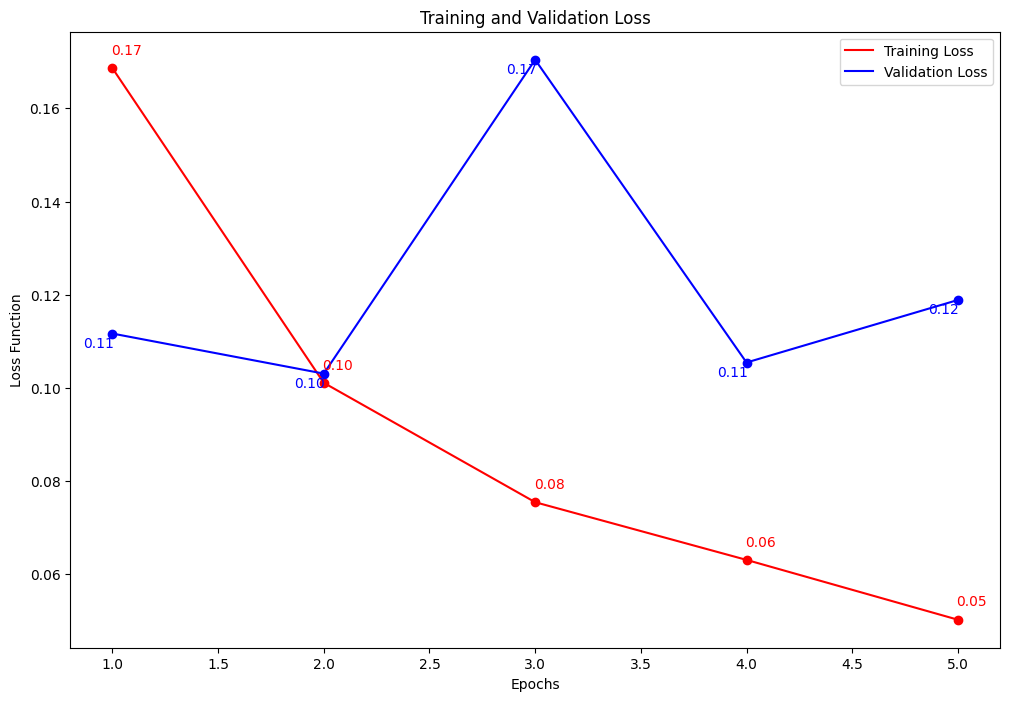

In [ ]:
#Displaying loss function results
loss_values=hist['loss']
val_loss_values=hist['val_loss']

epochs=range(1, EPOCHS+1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, loss_values, 'r', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')

for i, (loss, val_loss) in enumerate(zip(loss_values, val_loss_values)):
    plt.scatter(i + 1, loss, color='red', marker='o')  # Training Loss
    plt.annotate(f'{loss:.2f}', (i + 1, loss), textcoords="offset points", xytext=(10,10), ha='center', color='red')

    plt.scatter(i + 1, val_loss, color='blue', marker='o')  # Validation Loss
    plt.annotate(f'{val_loss:.2f}', (i + 1, val_loss), textcoords="offset points", xytext=(-10,-10), ha='center', color='blue')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Function')
plt.legend()
plt.show()

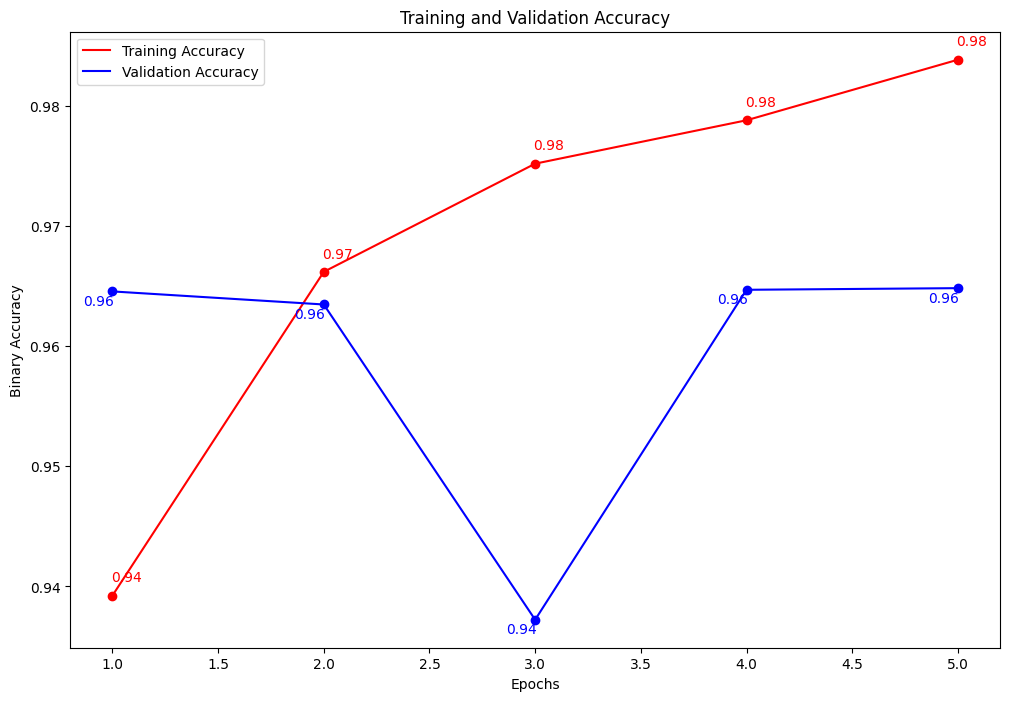

In [ ]:
#Displaying validation results
#plt.clf() #clears figure
acc_values=hist['acc']
val_acc_values=hist['val_acc']

plt.figure(figsize=(12, 8))
plt.plot(epochs, acc_values, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')

for i, (acc, val_acc) in enumerate(zip(acc_values, val_acc_values)):
    plt.scatter(i + 1, acc, color='red', marker='o')  # Training Loss
    plt.annotate(f'{acc:.2f}', (i + 1, acc), textcoords="offset points", xytext=(10,10), ha='center', color='red')

    plt.scatter(i + 1, val_acc, color='blue', marker='o')  # Validation Loss
    plt.annotate(f'{val_acc:.2f}', (i + 1, val_acc), textcoords="offset points", xytext=(-10,-10), ha='center', color='blue')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.show()

## Testing of the tuned Model

Now we will:


1.   Load a trained model from the project repository;
2.   Test the model on the portion splitted from the original dataset for training and validation, so to evaluate the model's performance on instances never seen before (but similar to those used for training and validation);
2.   Load a pre-processed test set of text samples, so to evaluate the model's performance on new instances that are also more different from the training data;



In [ ]:
#Testing

#machine-learning library for data analysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

from keras.models import load_model

#load pre-trained model
print('Available models:')
pattern=re.compile(r'tunedEmbModel.keras')
models=[]
for f in os.listdir(model_dir): #inspect folder's content
    if pattern.match(f):
      print('-', f)
      models.append(f)

testedModelpath=os.path.join(model_dir, models[0])
testedModel=load_model(testedModelpath)
print('\n')

#Convert test set into tensors of tensorflow
test_texts=test_dataset['text'].tolist()
test_labels=test_dataset['generated'].tolist()

test_data=tf.data.Dataset.from_tensor_slices((test_texts,test_labels))
test_data=test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Available models:
- tunedEmbModel.keras


In [ ]:
test_metrics_dict = {
    "loss": [],
    "accuracy": [],
    "AUC ROC": []
}

test_loss, test_acc=testedModel.evaluate(test_data)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

test_metrics_dict["loss"].append(test_loss)
test_metrics_dict["accuracy"].append(test_acc)

115/115 [==============================] - 34s 250ms/step - loss: 0.1143 - acc: 0.9675
Test Loss: 0.11430701613426208
Test Accuracy: 0.9675271511077881


In [ ]:
y_pred=testedModel.predict(test_data)
y_pred=(y_pred>0.5).astype(int)

print(len(y_pred))

115/115 [==============================] - 32s 251ms/step
7360


In [ ]:
print(len(test_labels))
report=classification_report(test_labels, y_pred)
accuracy=accuracy_score(test_labels, y_pred)
print(report)
print('\n')
print(accuracy)

7360
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3732
           1       0.97      0.96      0.97      3628

    accuracy                           0.97      7360
   macro avg       0.97      0.97      0.97      7360
weighted avg       0.97      0.97      0.97      7360



0.9675271739130434


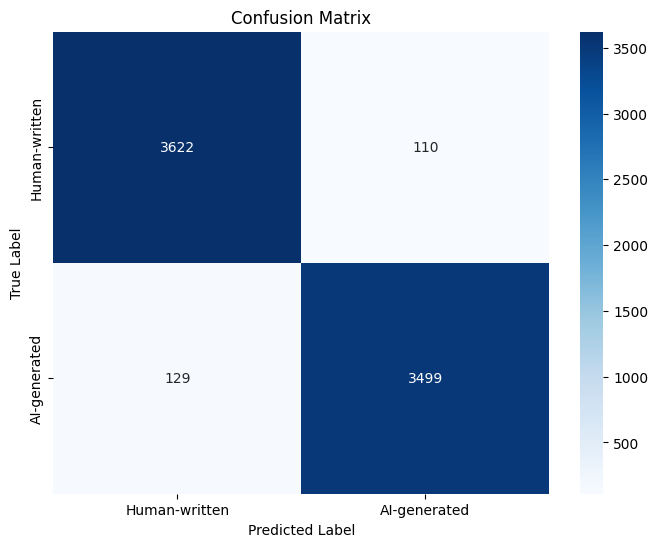

In [ ]:
import seaborn as sns
conf_matrix=confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human-written', 'AI-generated'], yticklabels=['Human-written', 'AI-generated'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

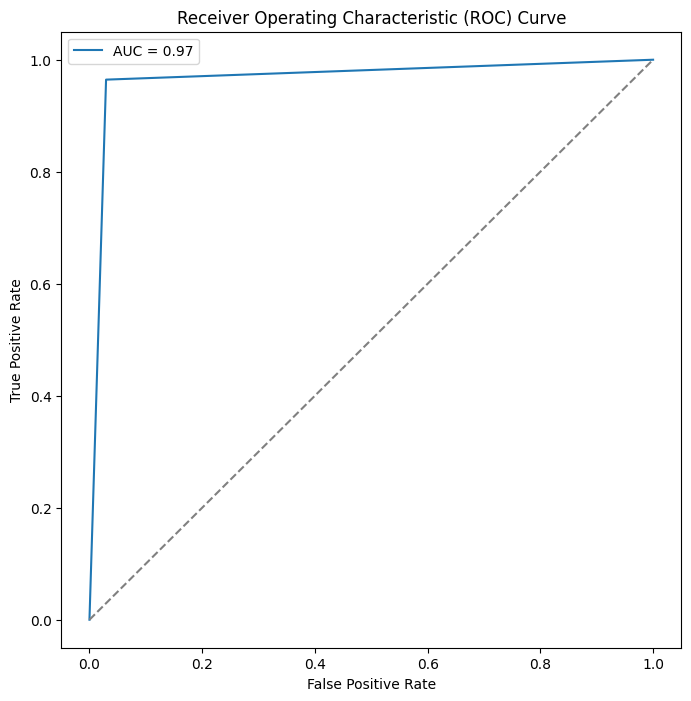

AUC: 0.9674842034858094


In [ ]:
auc_score=0

def plot_roc_curve(y_true, y_scores):
    global auc_score
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score = roc_auc_score(y_true, y_scores)

    print('\n')
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(test_labels, y_pred)
print('AUC:', auc_score)
test_metrics_dict["AUC ROC"].append(auc_score)

In [ ]:
#Load different testset
print('Available data:')
working_dir='/content/drive/MyDrive/DL/Project'
data_dir=file_path=os.path.join(working_dir, 'Project_datasets')
pattern=re.compile(r'processed_test.*\.csv$')
testSets=[]
for f in os.listdir(data_dir): #inspect folder's content
    if pattern.match(f):
      print('-', f)
      testSets.append(f)

print('\n')

testset2=load_dataframe_and_print_info(data_dir, testSets[0])
testset2=format_text(testset2)
text_to_string(testset2)

Available data:
- processed_test_setSWL.csv
- processed_test_setSW.csv
- processed_test_setSWS.csv
- processed_test_set.csv
- processed_test_setS.csv
- processed_test_setL.csv


Dataset processed_test_setSWL.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090 entries, 0 to 5089
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5090 non-null   object
 1   generated  5090 non-null   int64 
 2   prompt_id  4233 non-null   object
 3   source     5090 non-null   object
dtypes: int64(1), object(3)
memory usage: 159.2+ KB




,text,generated,prompt_id,source
0,positive attitude key success life agree statement good attitude everyday everywhere work school house firts agree attitude one main charisma person work everyone good character attitude important good worker work important arrive time good attitude amiable customer stay happy worker work good attitude customer give tip worker happy worker problem chief bos second think attitude important school every student go school everyday good attitude attitude one main charisma student student good attitude everyone spectable othres student attitude important friendly relation graduated remenber important good others continued good person good attitude finally house important keep good character good attitude think family important good attitude everyone good attitude live armony problem others attitude family one important everyone live without problem conclusion attitude one main charism one person many people good attitude others important good attitude everywhere good people,0,"Task: Write an essay discussing why attitude is an important charisma for success in life. Explore its importance in the workplace, school, and at home.",original_moth
1,school every single day nobody favorite free time others favorite hobby also take time alot studying making everything easy u year three year high school studying really hard stay four year addition including course summer evening may able take elective course really helpful hour free time could studying way knew prgrams glad found big change everybody else fifty fifty deal going miss one year also much go apply college job would time better coming outcome would helping spend summer school time le hour going school evening sleep miday four year total three year would fulltime also choice make evening summer day luckily anthing want could imagine put mind appear better day although everything life get want future go away age graduate young older person successful leader main priority life school since child always love coming school always focus life overcome end school always favorite saw friend start day also good connection studying buddy make everything work high school deploma way next door access everything ever need later future done high school feeling pot gold apply purssure get apply many awesome college time job program outstanding choice make choice missing life time opportunity,0,Task:\nResearch the 3-year high school program and the advantages and disadvantages of taking classes during the summer and evenings. Investigate ways to make the most of your free time and how to use it productively. Research the importance of completing a high school diploma and the opportunities that come with it. Consider the motivations and benefits of staying in school every single day and how connections made at school can be beneficial. Explore the idea of applying pressure to yourself to achieve success and how it leads to,original_moth
2,strongly believe art class drama acting music requirement student also strongly believe student freedom choose elective want take student freedom choose elective view class diver fun interactive required art class first people belief student required take art class music drama class others think student actually cooperate fullest pas class higher letter grad like unrequited class student actually take art class seriously fail low letter grade comparison student required class likely take class seriously knowing tighten asked thell get low grade multiple assignment like project class project event test nonparticipating student score drop significantly fact wrong student take art class begin true opinion student chance express true feeling reach main goal life people going tell use student career path fallow simply choose path really fact art class elective instead required art class fun self take art choose enjoy ever single part art requirement student unethical unheard far know music drama art class three amazing elective fore

In [ ]:
#Testing
test_texts2=testset2['text'].tolist()
test_labels2=testset2['generated'].tolist()

test_data2=tf.data.Dataset.from_tensor_slices((test_texts2,test_labels2))
test_data2=test_data2.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_loss2, test_acc2=testedModel.evaluate(test_data2)

print('Test Loss:', test_loss2)
print('Test Accuracy:', test_acc2)

test_metrics_dict["loss"].append(test_loss2)
test_metrics_dict["accuracy"].append(test_acc2)

80/80 [==============================] - 20s 253ms/step - loss: 0.6836 - acc: 0.8289
Test Loss: 0.6835529804229736
Test Accuracy: 0.8288801312446594


In [ ]:
y_pred2=testedModel.predict(test_data2)
y_pred2=(y_pred2>0.5).astype(int)

print(len(y_pred2))

80/80 [==============================] - 20s 252ms/step
5090


In [ ]:
print(len(test_labels2))
report2=classification_report(test_labels2, y_pred2)
accuracy2=accuracy_score(test_labels2, y_pred2)
print(report2)
print('\n')
print(accuracy2)

5090
              precision    recall  f1-score   support

           0       0.99      0.61      0.75      2187
           1       0.77      1.00      0.87      2903

    accuracy                           0.83      5090
   macro avg       0.88      0.80      0.81      5090
weighted avg       0.87      0.83      0.82      5090



0.8288801571709233


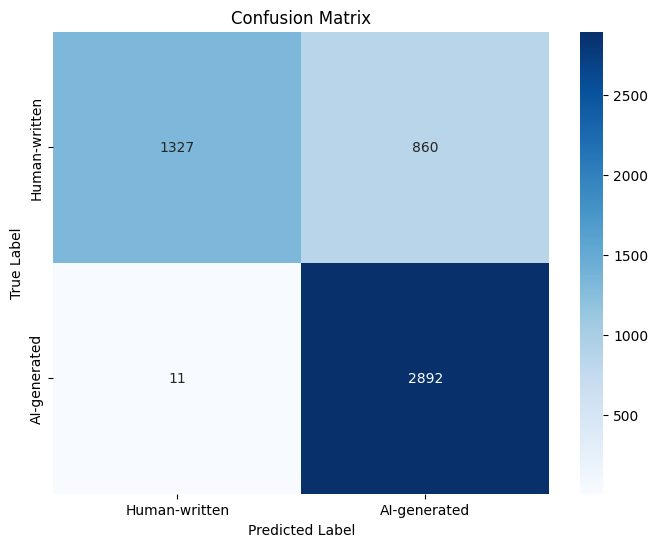

In [ ]:
import seaborn as sns
conf_matrix2=confusion_matrix(test_labels2, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['Human-written', 'AI-generated'], yticklabels=['Human-written', 'AI-generated'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

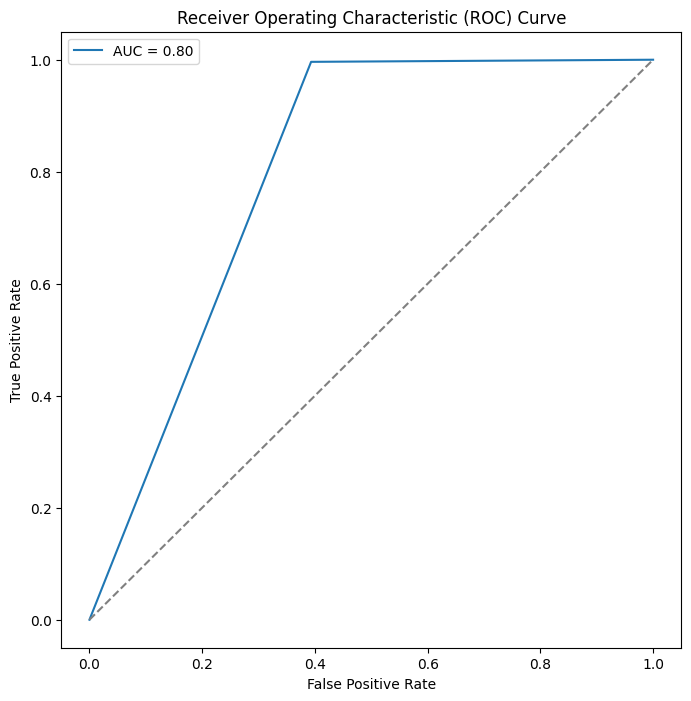

AUC: 0.8014890387425398


In [ ]:
auc_score2=0

def plot_roc_curve(y_true, y_scores):
    global auc_score2
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score2 = roc_auc_score(y_true, y_scores)#

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score2:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(test_labels2, y_pred2)
print('AUC:', auc_score2)
test_metrics_dict["AUC ROC"].append(auc_score2)

In [ ]:
#Kaggle Submissions
https://www.kaggle.com/code/michebareng/stopwords-lemm-classic-model?scriptVersionId=186933042&cellId=1 #reduced embedding

https://www.kaggle.com/code/michebareng/lstm-tuned-model?scriptVersionId=186880932&cellId=1 #complete tuning

https://www.kaggle.com/code/michebareng/tuned-model-glove?scriptVersionId=186942625&cellId=1 #complete tuning + GloVe

In [ ]:
#Save test results

metrics_df = pd.DataFrame(test_metrics_dict)

test_name=os.path.join(model_dir, 'testTuned_results_1.csv')
print("Model's testing results stored in: ", test_name)

try:
    metrics_df.to_csv(test_name, index=False)
    print("Saving successful.")
except Exception as e:
    print("Error occurred while saving:", e)

Model's testing results stored in:  /content/drive/MyDrive/DL/Project/Trained_Models/testTuned_results_1.csv
Saving successful.
